# 实现手写数字识别 | 第1天




## 一、前期工作

### 1.设置GPU

In [ ]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")

if gpus:
  gpu0 = gpus[0]  #如果有多个GPU，仅使用第0个GPU
  tf.config.experimental.set_memory_growth(gpu0, True)
  tf.config.set_visible_devices([gpu0], "GPU")

### 2.导入数据

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### 3.归一化

In [ ]:
# 将像素的值标准化至0到1的区间内。
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

### 4.可视化图片

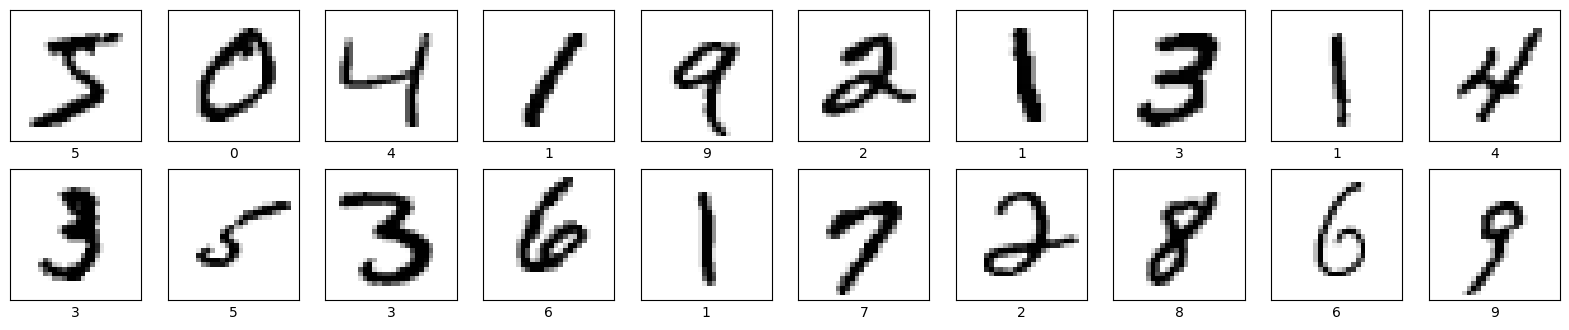

In [ ]:
plt.figure(figsize=(20,10))
for i in range(20):
  plt.subplot(5, 10, i+1)
  # 隐藏子图的刻度线
  plt.xticks([])
  plt.yticks([])
  # 隐藏子图的网格线
  plt.grid(False)
  # 指定图像的颜色映射为二进制
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])

### 5.调整图片格式

In [ ]:
#调整数据到我们需要的格式
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

## 二、构建CNN网络模型

In [ ]:
model = models.Sequential([
    #卷积层1，卷积核3*3
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    #池化层1，2*2采样
    layers.MaxPooling2D((2, 2)),
    #卷积层2，卷积核3*3
    layers.Conv2D(64, (3, 3), activation='relu'),
    #池化层2，2*2采样
    layers.MaxPool2D((2, 2)),
    #Flatten层，连接卷积层与全连接层
    layers.Flatten(),
    #全连接层，特征进一步提取
    layers.Dense(64, activation='relu'),
    #输出层，输出预期结果
    layers.Dense(10)
])
# 打印网络结构
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

## 三、编译模型

In [ ]:
model.compile(optimizer='adam',
       # 这里指定了损失函数，即使用稀疏分类交叉熵损失函数。
       # from_logits=True表示模型的输出是未经过softmax激活的原始预测值。
       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
       # 这里指定了评估指标，即在训练过程中计算模型的准确率。
       metrics=['accuracy'])

## 四、训练模型

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
           # 这是验证数据集，用于在训练过程中评估模型的性能。
           validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 2.3016 - accuracy: 0.1116 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 -

## 五、预测

通过下面的网络结构我们可以简单理解为，输入一张图片，将会得到一组数，这组代表这张图片上的数字为0~9中每一个数字的几率，out数字越大可能性越大。

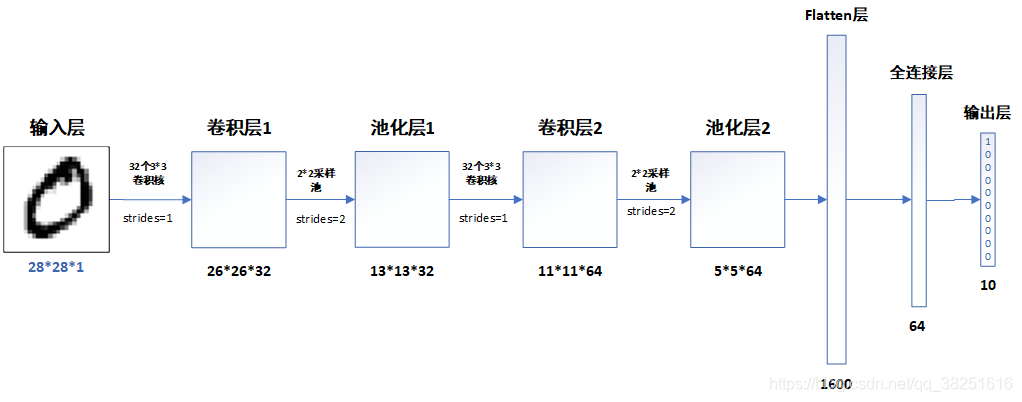

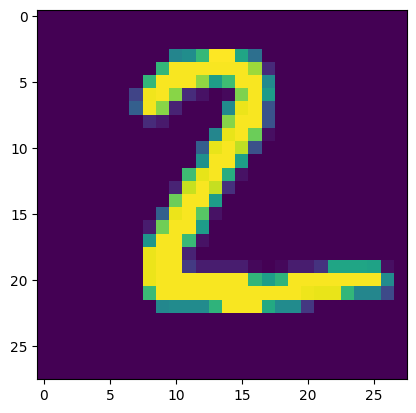

In [ ]:
plt.imshow(test_images[1])

In [ ]:
# 输出测试集中第一张图片的预测结果
pre = model.predict(test_images)
pre[1]

313/313 [==============================] - 4s 11ms/step


array([-0.02481839,  0.10440216,  0.01422611,  0.00460296, -0.0365326 ,
       -0.10777445, -0.02044323,  0.03328515, -0.01653616,  0.00176471],
      dtype=float32)

# 彩色图片分类 | 第2天

## 一、前期工作

### 1.设置GPU

In [ ]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")

if gpus:
  #如果有多个GPU，仅使用第0个GPU
  gpu0 = gpus[0]
  #设置GPU显存用量按需使用
  tf.config.experimental.set_memory_growth(gpu0, True)
  tf.config.set_visible_devices([gpu0], "GPU")

### 2.导入数据

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

### 3.归一化

In [ ]:
# 将像素的值标准化至0到1的区间内。
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

### 4.可视化

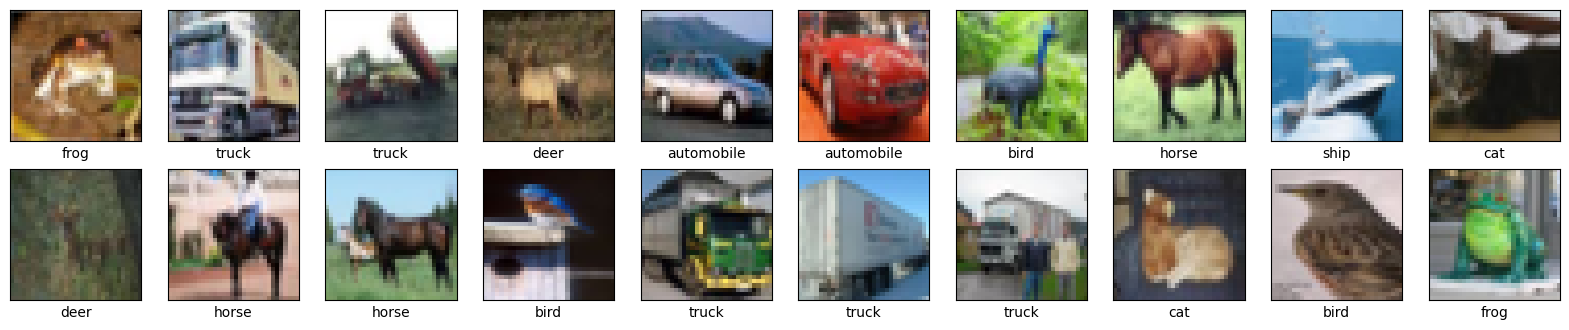

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20, 10))
for i in range(20):
  plt.subplot(5, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_lables[i][0]])
plt.show()

## 二、构建CNN网络

In [ ]:
model = models.Sequential([
    # 卷积层1，卷积核3*3
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # 池化层1，2*2采样
    layers.MaxPooling2D((2, 2)),
    # 卷积层2，卷积核3*3
    layers.Conv2D(64, (3, 3), activation='relu'),
    # 池化层2，2*2采样
    layers.MaxPooling2D((2, 2)),
    # 卷积层3，卷积核3*3
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Flatten层，连接卷积层与全连接层
    layers.Flatten(),
    # 全连接层，特征进一步提取
    layers.Dense(64, activation='relu'),
    # 输出层，输出预期结果
    layers.Dense(10)
])

# 打印网络结构
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

## 三、编译

In [ ]:
model.compile(optimizer='adam',
       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
       metrics=['accuracy'])

## 四、训练模型

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
           # 这是验证数据集，用于在训练过程中评估模型的性能。
           validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.5435 - accuracy: 0.4340 - val_loss: 1.2903 - val_accuracy: 0.5369
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1976 - accuracy: 0.5754 - val_loss: 1.1076 - val_accuracy: 0.6069
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.0418 - accuracy: 0.6344 - val_loss: 1.0080 - val_accuracy: 0.6456
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9419 - accuracy: 0.6699 - val_loss: 0.9563 - val_accuracy: 0.6702
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8646 - accuracy: 0.6976 - val_loss: 0.9205 - val_accuracy: 0.6839
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8073 - accuracy: 0.7163 - val_loss: 0.9483 - val_accuracy: 0.6745
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7472 - accuracy: 0.7396 - val_loss: 0.8954 -

## 五、预测

通过模型进行预测得到的是每一个类别的概率，数字越大该图片为该类别的可能性越大

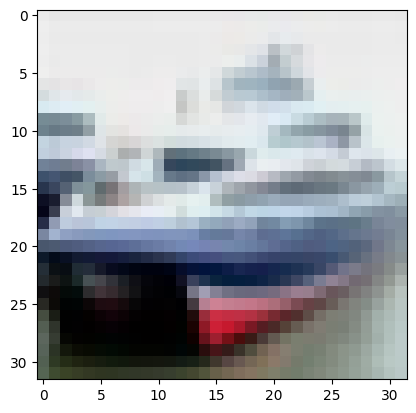

In [ ]:
plt.imshow(test_images[1])

In [ ]:
import numpy as np

pre = model.predict(test_images)
print(class_names[np.argmax(pre[1])])

313/313 [==============================] - 5s 16ms/step
ship


## 六、模型评估

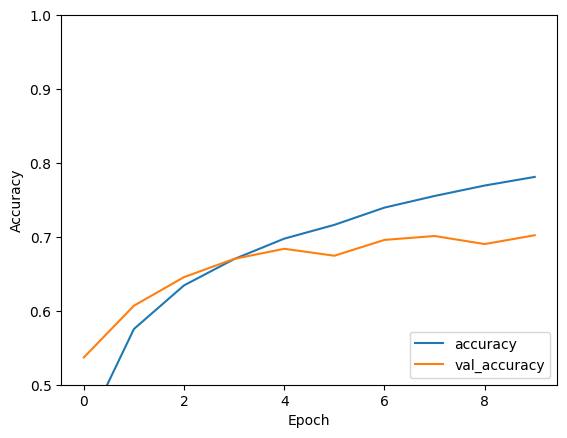

313/313 - 4s - loss: 0.8995 - accuracy: 0.7022 - 4s/epoch - 14ms/step


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
# 显示图例，将"accuracy"和"val_accuracy"标签放在右下角。
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7021999955177307


# 服装图像分类 | 第三天

## 一、前期工作

### 1.设置GPU

In [ ]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")

if gpus:
  gpu0 = gpus[0]
  tf.config.experimental.set_memory_growth(gpu0, True)
  tf.config.set_visible_devices([gpu0], "GPU")

### 2.导入数据

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

### 3.归一化

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

加载数据集会返回四个 NumPy 数组：

train_images 和 train_labels 数组是训练集，模型用于学习的数据。

test_images 和 test_labels 数组是测试集,会被用来对模型进行测试。

图像是 28x28 的 NumPy 数组，像素值介于 0 到 255 之间。标签是整数数组，介于 0 到 9 之间。这些标签对应于图像所代表的服装类：

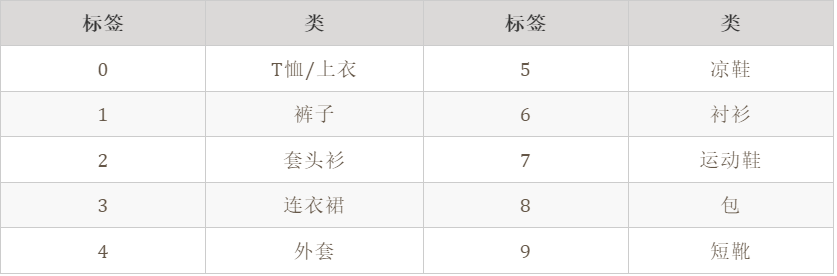

### 4.调整图片格式

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

### 5.可视化

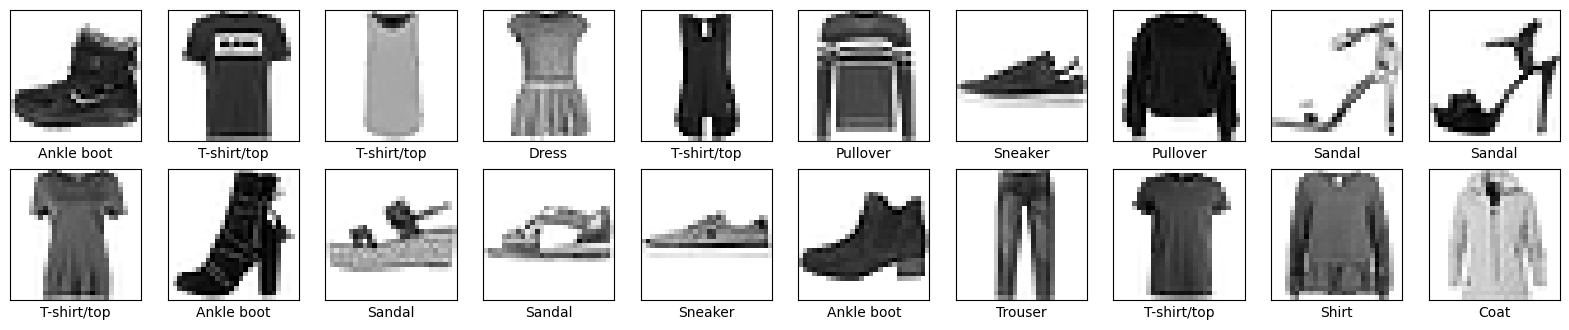

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(20,10))
for i in range(20):
  plt.subplot(5, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## 二、构建CNN网络

卷积神经网络（CNN）的输入是张量 (Tensor) 形式的 (image_height, image_width, color_channels)，包含了图像高度、宽度及颜色信息。不需要输入batch size。color_channels 为 (R,G,B) 分别对应 RGB 的三个颜色通道（color channel）。在此示例中，我们的 CNN 输入，fashion_mnist 数据集中的图片，形状是 (28, 28, 1)即灰度图像。我们需要在声明第一层时将形状赋值给参数input_shape。

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

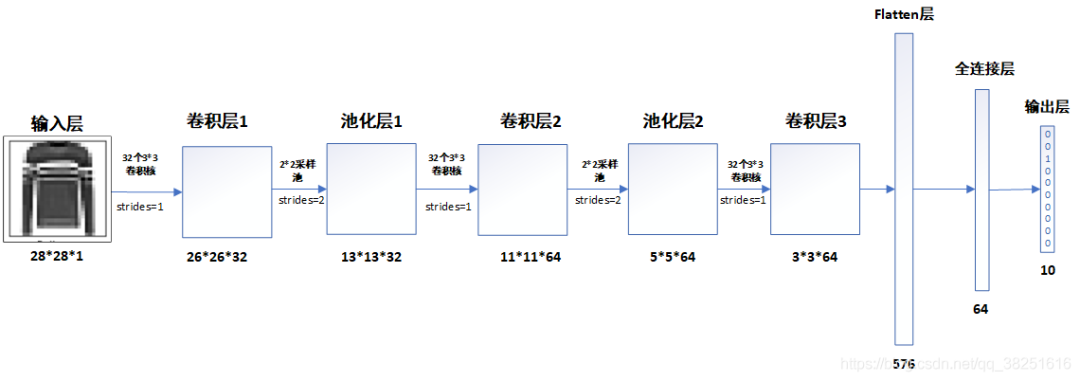

## 三、编译
在准备对模型进行训练之前，还需要再对其进行一些设置。以下内容是在模型的编译步骤中添加的：

损失函数（loss）：用于测量模型在训练期间的准确率。您会希望最小化此函数，以便将模型“引导”到正确的方向上。

优化器（optimizer）：决定模型如何根据其看到的数据和自身的损失函数进行更新。

指标（metrics）：用于监控训练和测试步骤。以下示例使用了准确率，即被正确分类的图像的比率。


In [ ]:
model.compile(optimizer='adam',
       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
       metrics=['accuracy'])

## 四、训练模型

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
           validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.4942 - accuracy: 0.8196 - val_loss: 0.3594 - val_accuracy: 0.8701
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3200 - accuracy: 0.8842 - val_loss: 0.3240 - val_accuracy: 0.8800
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2744 - accuracy: 0.9000 - val_loss: 0.2879 - val_accuracy: 0.8952
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2444 - accuracy: 0.9102 - val_loss: 0.2744 - val_accuracy: 0.9003
Epoch 5/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2212 - accuracy: 0.9182 - val_loss: 0.2807 - val_accuracy: 0.8956
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1994 - accuracy: 0.9254 - val_loss: 0.2738 - val_accuracy: 0.9050
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1849 - accuracy: 0.9317 - val_loss: 0.2744 -

## 五、预测
预测结果是一个包含 10 个数字的数组。它们代表模型对 10 种不同服装中每种服装的“置信度”。我们可以看到哪个标签的置信度值最大

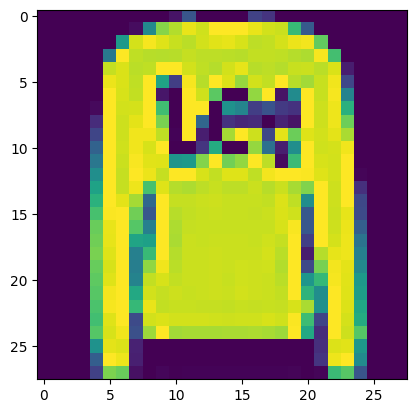

In [ ]:
plt.imshow(test_images[1])

In [ ]:
import numpy as np

pre = model.predict(test_images)
print(class_names[np.argmax(pre[1])])

313/313 [==============================] - 3s 8ms/step
Pullover


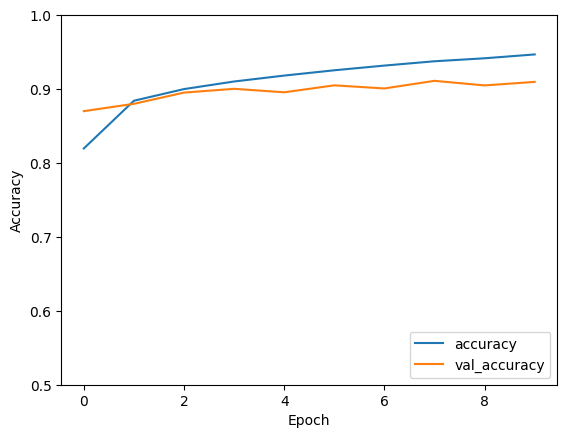

313/313 - 2s - loss: 0.2822 - accuracy: 0.9097 - 2s/epoch - 7ms/step


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
print("测试准确率为：",test_acc)

测试准确率为： 0.9096999764442444


# 花朵识别 | 第四天

## 一、前期工作

### 1.设置GPU

In [ ]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")

if gpus:
    gpu0 = gpus[0]                                        #如果有多个GPU，仅使用第0个GPU
    tf.config.experimental.set_memory_growth(gpu0, True)  #设置GPU显存用量按需使用
    tf.config.set_visible_devices([gpu0],"GPU")

### 2.下载数据

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models

import pathlib

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file(fname = 'flower_photos',
                   origin = dataset_url,
                   untar = True,
                   cache_dir = '/content/DL-100-days')
# 将下载后的数据集目录路径转换为pathlib.Path对象，以便后续操作使用。
data_dir = pathlib.Path(data_dir)
data_dir

228813984/228813984 [==============================] - 2s 0us/step


### 3.检查数据
数据集一共分为daisy、dandelion、roses、sunflowers、tulips五类，分别存放于flower_photo文件夹中的五个子文件夹中

In [ ]:
# 计算指定目录下所有子目录中的图片文件数量。
image_count = len(list(data_dir.glob('*/*.jpg')))

print("图片总数为：",image_count)

图片总数为： 3670


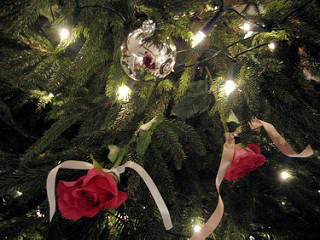

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

## 二、数据预处理

### 1.加载数据
使用`image_dataset_from_directory`方法将磁盘中的数据加载到`tf.data.Dataset中`

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


我们可以通过class_names输出数据集的标签。标签将按字母顺序对应于目录名称。

In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


### 2.可视化数据

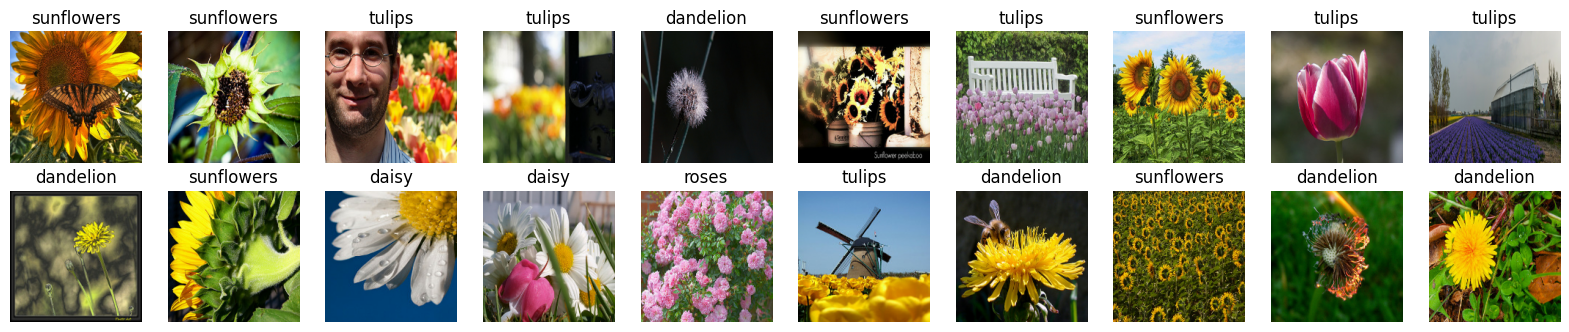

In [ ]:
plt.figure(figsize=(20, 10))

# 通过train_ds.take(1)获取训练数据集中的一个批次
for images, labels in train_ds.take(1):
  for i in range(20):
    ax = plt.subplot(5, 10, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    # 关闭坐标轴显示
    plt.axis("off")

### 3.再次检查数据

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


`Image_batch`是形状的张量（32,180,180,3）。这是一批形状180x180x3的32张图片（最后一维指的是彩色通道RGB）。

`Label_batch`是形状（32，）的张量，这些标签对应32张图片

### 4.配置数据集
`shuffle()`：打乱数据

`prefetch()`：预取数据，加速运行

`cache()`：将数据集缓存到内存当中，加速运行

In [ ]:
# 将AUTOTUNE设置为TensorFlow数据集的自动调整参数，它可以根据可用的系统资源自动选择最佳的数值。
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## 三、构建CNN网络

In [ ]:
num_classes = 5

model = models.Sequential([
    # 使用了TensorFlow的预处理层Rescaling来对输入图像进行归一化
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), # 卷积层1，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   # 池化层1，2*2采样
    layers.Conv2D(32, (3, 3), activation='relu'),  # 卷积层2，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   # 池化层2，2*2采样
    layers.Conv2D(64, (3, 3), activation='relu'),  # 卷积层3，卷积核3*3

    layers.Flatten(),                       # Flatten层，连接卷积层与全连接层
    layers.Dense(128, activation='relu'),   # 全连接层，特征进一步提取
    layers.Dense(num_classes)               # 输出层，输出预期结果
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 64)       

## 四、编译

In [ ]:
model.compile(optimizer='adam',
       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
       metrics=['accuracy'])

## 五、训练模型

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
92/92 [==============================] - 115s 1s/step - loss: 1.5532 - accuracy: 0.4019 - val_loss: 1.1048 - val_accuracy: 0.5681
Epoch 2/10
92/92 [==============================] - 101s 1s/step - loss: 0.9887 - accuracy: 0.6090 - val_loss: 0.9984 - val_accuracy: 0.6117
Epoch 3/10
92/92 [==============================] - 100s 1s/step - loss: 0.7793 - accuracy: 0.6986 - val_loss: 1.0232 - val_accuracy: 0.6035
Epoch 4/10
92/92 [==============================] - 101s 1s/step - loss: 0.5265 - accuracy: 0.8123 - val_loss: 1.0908 - val_accuracy: 0.6049
Epoch 5/10
92/92 [==============================] - 100s 1s/step - loss: 0.2942 - accuracy: 0.9002 - val_loss: 1.3244 - val_accuracy: 0.5899
Epoch 6/10
92/92 [==============================] - 105s 1s/step - loss: 0.1451 - accuracy: 0.9513 - val_loss: 1.4347 - val_accuracy: 0.5940
Epoch 7/10
92/92 [==============================] - 108s 1s/step - loss: 0.0755 - accuracy: 0.9796 - val_loss: 1.7125 - val_accuracy: 0.6253
Epoch 8/10
92

## 六、模型评估

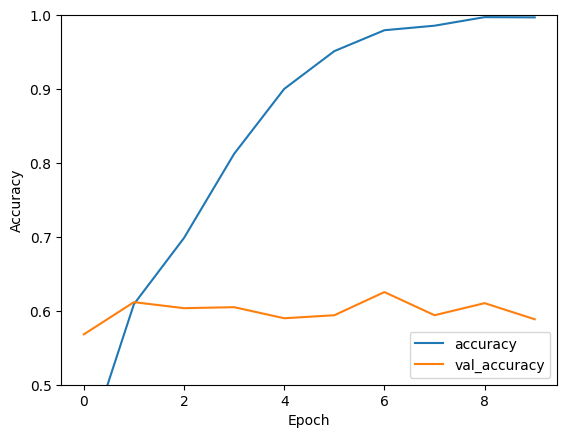

23/23 - 9s - loss: 2.3718 - accuracy: 0.5886 - 9s/epoch - 380ms/step


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(val_ds, verbose=2)

从上面可以看出随着迭代次数的增加，训练准确率与验证准确率之间的差距逐步增加，这是由于过拟合导致

In [ ]:
print("验证准确率为：",test_acc)

验证准确率为： 0.5885558724403381


# 天气识别 | 第5天

## 前期工作
本文将采用CNN实现多云、下雨、晴、日出四种天气状态的识别。较上篇文章，本文为了增加模型的泛化能力，新增了Dropout层并且将最大池化层调整成了平均池化层。

### 1.设置GPU

In [ ]:
import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")

if gpus:
    gpu0 = gpus[0]                                        #如果有多个GPU，仅使用第0个GPU
    tf.config.experimental.set_memory_growth(gpu0, True)  #设置GPU显存用量按需使用
    tf.config.set_visible_devices([gpu0],"GPU")

### 2.导入数据

In [ ]:
import matplotlib.pyplot as plt
import os, PIL

# 设置随机种子尽可能使结果可以重现
import numpy as np
np.random.seed(1)

# 设置随机种子尽可能使结果可以重现
import tensorflow as tf
tf.random.set_seed(1)

from tensorflow import keras
from tensorflow.keras import layers, models

import pathlib

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/weather_photos.tgz"

data_dir = tf.keras.utils.get_file(fname    = 'weather_photos', # 下载到本地后的文件名称
                   origin   = dataset_url,     # 数据集(Dataset)的URL路径；
                   untar    = True,            # 是否解压文件
                   cache_dir = '/content')

data_dir = pathlib.Path(data_dir)
data_dir

Exception: ignored